In [1]:
from pathlib import Path
import requests
from isce2_topsapp.solid_earth_tides import compute_solid_earth_tide_from_gunw, update_gunw_with_solid_earth_tide

In [2]:
url = 'https://grfn.asf.alaska.edu/door/download/S1-GUNW-A-R-064-tops-20210723_20210711-015001-35393N_33512N-PP-6267-v2_0_4.nc'
gunw_path = Path(url.split('/')[-1])

# resp = requests.get(url)
# with open(gunw_path, 'wb') as file:
#     file.write(resp.content)

In [3]:
set_ds = compute_solid_earth_tide_from_gunw(gunw_path)
set_ds

/Users/cmarshak/opt/anaconda3/envs/topsapp_env/lib/python3.9/site-packages/pysolid/grid.py:93: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1062`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fc = np.loadtxt(txt_file,


<xarray.Dataset>
Dimensions:         (height: 4, latitude: 26, longitude: 37)
Coordinates:
  * longitude       (longitude) float64 -119.2 -119.1 -119.0 ... -115.7 -115.6
  * latitude        (latitude) float64 35.7 35.6 35.5 35.4 ... 33.4 33.3 33.2
  * height          (height) float64 -1.5e+03 0.0 3e+03 9e+03
    spatial_ref     int64 0
Data variables:
    solidEarthTide  (height, latitude, longitude) float64 17.8 17.7 ... 14.47

In [4]:
update_gunw_with_solid_earth_tide(gunw_path)

/Users/cmarshak/opt/anaconda3/envs/topsapp_env/lib/python3.9/site-packages/pysolid/grid.py:93: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1062`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fc = np.loadtxt(txt_file,


PosixPath('S1-GUNW-A-R-064-tops-20210723_20210711-015001-35393N_33512N-PP-6267-v2_0_4.nc')

/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_65099/183130835.py:8: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  [df_world.boundary.plot(ax=ax, color='black') for ax in s.axes[0]]
/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_65099/183130835.py:9: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  [ax.set_ylim(ymin, ymax) for ax in s.axes[0]]
/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_65099/183130835.py:10: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  [ax.set_xlim(xmin, xmax) for ax in s.axes[0]]


[(-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001)]

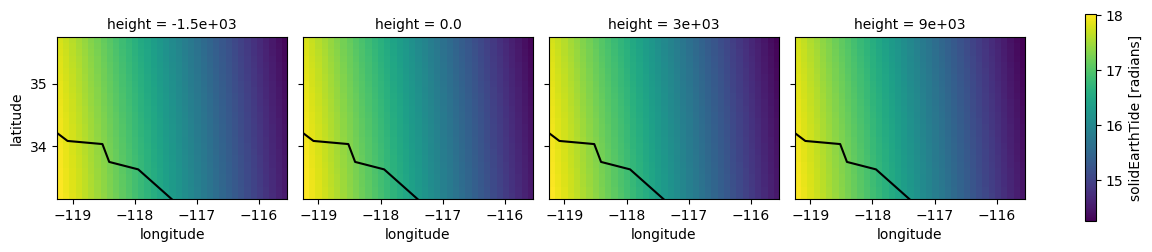

In [5]:
import geopandas as gpd
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
xmin, ymin, xmax, ymax = set_ds.rio.bounds()

s = set_ds['solidEarthTide'].plot.imshow(col='height', 
                                         col_wrap=4, 
                                         extent=[xmin, ymin, xmax, ymax])
[df_world.boundary.plot(ax=ax, color='black') for ax in s.axes[0]]
[ax.set_ylim(ymin, ymax) for ax in s.axes[0]]
[ax.set_xlim(xmin, xmax) for ax in s.axes[0]]

In [6]:
import rasterio
from rasterio.crs import CRS
from affine import Affine

with rasterio.open(f'netcdf:{gunw_path}:/science/grids/corrections/external/tides/solidEarthTide') as ds:
    p = ds.profile

Make sure lat/lon

In [7]:
assert p['crs'] == CRS.from_epsg(4326)

In [8]:
import numpy as np

assert np.isnan(p['nodata'])

Make sure transform is not identity and not None

In [9]:
assert p['transform']

In [10]:
assert p['transform'] != Affine(1, 0, 0, 0, 1, 0)